# Modeling the blackbody sprectrum and calculating peak
# wavelengths and Energies:
**Diego B.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy.constants as sci

C:\Users\diego\AppData\Local\Temp\ipykernel_10744\3760365947.py:24: RuntimeWarning: overflow encountered in exp
  B_wav = (a) / ( (W**5) * (np.exp(b) - 1.0) )
C:\Users\diego\AppData\Local\Temp\ipykernel_10744\3760365947.py:56: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(Bwav_100), 'm.-') # 250K darkblue line
C:\Users\diego\AppData\Local\Temp\ipykernel_10744\3760365947.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(Bwav_50), 'y.-') # 250K black line


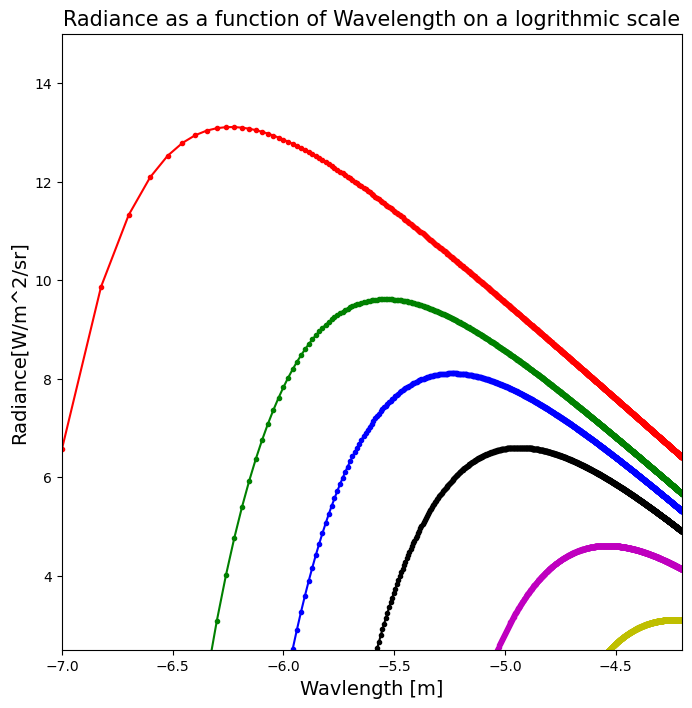

In [2]:
#Problem 4 (first part):

#calling the constants

h = sci.h #[J*s] #plancks constant

c = sci.c #[m*s^-1] #speed of light

k = sci.k #[m^2*kg*s^-1*K^-1] #Boltzman constant

#creating plack function:

#I am coding the Planck function that Dr.Yan Fernandez uses in AST 4700 since it has less approximation than the one in  
#the notes from class.

def planck_func_wav( W , T ):
    """This function is the wavelength space Planck function.
    W[m] is the wavelength as INPUT and T[K] is the temperature as INPUT.
    The output is the flux density or power per area per solid angle"""
    

    a = 2.0*h*(c**2)
    b = (h*c) / (W*k*T)
    B_wav = (a) / ( (W**5) * (np.exp(b) - 1.0) )
             
    return B_wav

#plotting:

#x--axis: an array of wavelengths from 0.1e-6 meters to 100e-6 meters with a stepsize of 0.5e-6 meters

wavelengths = np.arange(0.1e-6, 100.01e-6, 0.05e-6) 

#y-axis

# Radiance at 5000K, 1000K, 500K, 250K, 100K, 50K
Bwav_5000 = planck_func_wav(wavelengths, 5000)
Bwav_1000 = planck_func_wav(wavelengths, 1000)
Bwav_500 = planck_func_wav(wavelengths, 500)
Bwav_250 = planck_func_wav(wavelengths, 250)
Bwav_100 = planck_func_wav(wavelengths, 100)
Bwav_50 = planck_func_wav(wavelengths, 50)


#plotting

#x-axis is the log of the wavelength array, as specified in the question
#y-axis is the log of the resulting radiances from the planck function I coded
plt.figure( figsize = ( 8, 8 ) ) 


plt.plot(np.log10(wavelengths), np.log10(Bwav_5000), 'r.-') #5000K redline
plt.plot(np.log10(wavelengths), np.log10(Bwav_1000), 'g.-') # 1000K green line
plt.plot(np.log10(wavelengths), np.log10(Bwav_500), 'b.-') # 500K blue line
plt.plot(np.log10(wavelengths), np.log10(Bwav_250), 'k.-') # 250K black line
plt.plot(np.log10(wavelengths), np.log10(Bwav_100), 'm.-') # 250K darkblue line
plt.plot(np.log10(wavelengths), np.log10(Bwav_50), 'y.-') # 250K black line



# show the plot

#limiting the axes in order to show all the important regions of the plots
plt.xlim(-7, -4.2)
plt.ylim(2.5,15)

#showing the plot and labeling the axes
plt.xlabel('Wavlength [m]', fontsize = 14)
plt.ylabel('Radiance[W/m^2/sr]', fontsize = 14)
plt.title('Radiance as a function of Wavelength on a logrithmic scale', fontsize=15)
plt.show()


In [3]:
#demonstrating weins law:

def weins_law(T):
    """This is a weins law. The constant of 2897.8e-6 [meters*Kelvin]
    divided by the temperature of a body in Kelvins. Temperture in Kelvin is the INPUT.
    Peak wavelength in micrometers is the OUTPUT."""
    
    wav_pk = 2897.8e-6 / T
    
    return wav_pk

#creating an array of the tempuratures

Temp_prob_4 = np.array([5000,1000,500,250,100,50])

#iterating through the temperatures in order to get the peak wavelengths

for i in range(len(Temp_prob_4)):
    
    peak_waveslengths = weins_law(Temp_prob_4[i])
    
    #checking in witch part of the EM spectrum each peak wavelength is in using the parameters in the textbook:
    if (peak_waveslengths< 10e-10):
        
        EM_Spec = 'Gamma Ray'
        
    if (10e-10 <peak_waveslengths< 100e-10):
        
        EM_Spec = 'X-Ray'
        
    if (100e-10 <peak_waveslengths< 4000e-10):
        
        EM_Spec = 'Ultraviolet'
    
    if (400e-9<peak_waveslengths<670e-9):
        
        EM_Spec = 'Visible'
     
    if (0.67e-6<peak_waveslengths<1.0e-6):
        
        EM_Spec = 'Near Infrared'
        
    if (1.0e-6<peak_waveslengths<3.0e-6):
        
        EM_Spec = 'Shortwave Infrared'
        
    if (3.0e-6<peak_waveslengths<50e-6):
        
        EM_Spec = 'Thermal Infrared'
        
    if (50e-6<peak_waveslengths<1e-3):
        
        EM_Spec = 'Microwave/Radio'
        
    if (1e-3<peak_waveslengths):
        
        EM_Spec = 'Microwave/Radio'

    #printing the answer:
    print(f"The peak wavelength for {Temp_prob_4[i]}K is {peak_waveslengths} meters, in the {EM_Spec} portion of the EM Spectrum\n")
    

The peak wavelength for 5000K is 5.7956e-07 meters, in the Visible portion of the EM Spectrum

The peak wavelength for 1000K is 2.8978e-06 meters, in the Shortwave Infrared portion of the EM Spectrum

The peak wavelength for 500K is 5.7956e-06 meters, in the Thermal Infrared portion of the EM Spectrum

The peak wavelength for 250K is 1.15912e-05 meters, in the Thermal Infrared portion of the EM Spectrum

The peak wavelength for 100K is 2.8978e-05 meters, in the Thermal Infrared portion of the EM Spectrum

The peak wavelength for 50K is 5.7956e-05 meters, in the Microwave/Radio portion of the EM Spectrum



In [4]:
#creating arrays for the colors and wavelengths

wav_color = np.array(['Blue' , 'Green', 'Red'])
wav_len_color = np.array([ 465e-9 , 532e-9 , 630e-9])

#creating a function for the Planck-Einstein Relation:

def P_E_Energies(W):
    """Function calculating the Energy [Joules] of light from Wavelength. 
    Wavelength [m] in meters is the INPUT. Energy [J] is the OUTPUT. """
    
    Energy = (h*c)/W
    
    return Energy

#calculating the energies for all of the colors

for j in range(len(wav_len_color)):
    
    Color_light = wav_color[j]
    E_light = P_E_Energies(wav_len_color[j])
    
    #printing the answer:
    
    print(f"The Energy of {Color_light} light is {E_light} Joules assuming the wavelength is {wav_len_color[j]*1e9}nm\n")

The Energy of Blue light is 4.271926574513825e-19 Joules assuming the wavelength is 465.0nm

The Energy of Green light is 3.733920784114527e-19 Joules assuming the wavelength is 532.0nm

The Energy of Red light is 3.1530886621411566e-19 Joules assuming the wavelength is 630.0nm

